## Imports

In [0]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Reading the dataset

In [0]:
firesDF = pd.read_csv("/content/gdrive/My Drive/Big Data Analytics/Data/fires_processed.csv", low_memory=False) 

## Bar Charts

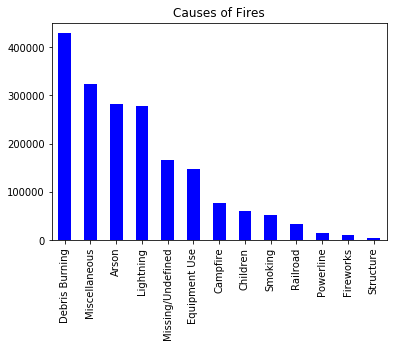

In [0]:
firesDF['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar',color='blue',title="Causes of Fires")

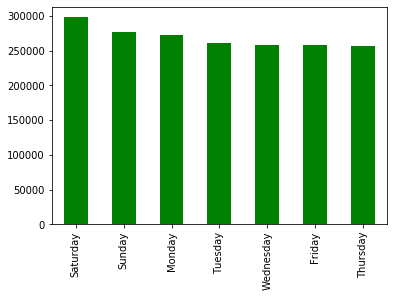

In [0]:
firesDF['DAY_OF_WEEK'].value_counts().plot(kind='bar',color='green')

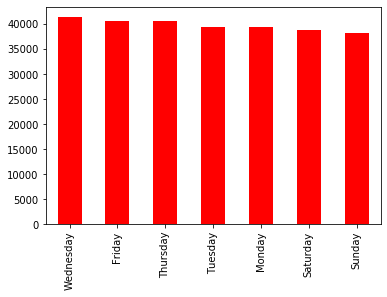

In [0]:
df_lightning = firesDF[firesDF['STAT_CAUSE_DESCR']=='Lightning']
df_lightning['DAY_OF_WEEK'].value_counts().plot(kind='bar',color='red')

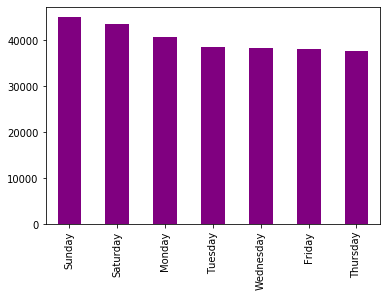

In [0]:
df_arson = firesDF[firesDF['STAT_CAUSE_DESCR']=='Arson']
df_arson['DAY_OF_WEEK'].value_counts().plot(kind='bar',color='purple')

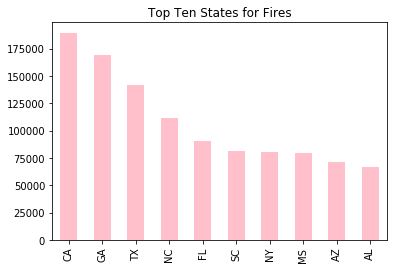

In [0]:
firesDF['STATE'].value_counts().head(n=10).plot(kind='bar',color='pink',title="Top Ten States for Fires")

In [0]:
df_NY = firesDF[firesDF['STATE']=='NY']
df_CA = firesDF[firesDF['STATE']=='CA']
df_TX = firesDF[firesDF['STATE']=='TX']

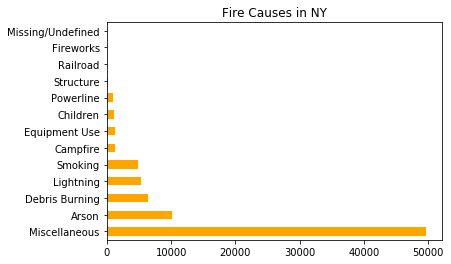

In [0]:
df_NY['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='orange',title='Fire Causes in NY')

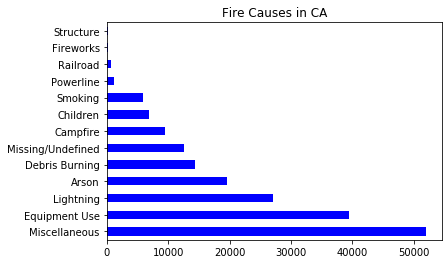

In [0]:
df_CA['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='blue',title='Fire Causes in CA')

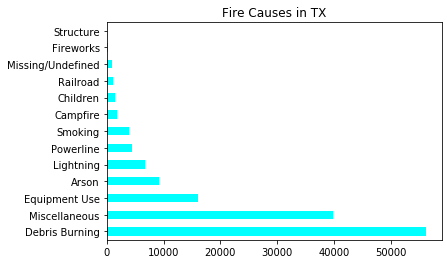

In [0]:
df_TX['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='cyan',title='Fire Causes in TX')

# Scatter Plot

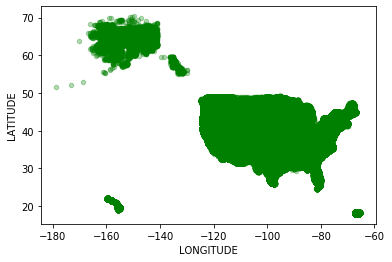

In [0]:
firesDF.plot(kind='scatter',x='LONGITUDE',y='LATITUDE',color='green',alpha=0.3)

# Correlation Matrix

In [0]:
import matplotlib.pyplot as plt

In [0]:
# Generating Correlation Matrix
firesML = firesDF[['FIRE_YEAR', 'STAT_CAUSE_DESCR', 'LATITUDE', 'LONGITUDE', 'STATE', 'FIRE_SIZE', 'DATE', 'MONTH', 'DAY_OF_WEEK']]

firesML.corr()

,FIRE_YEAR,LATITUDE,LONGITUDE,FIRE_SIZE,MONTH
FIRE_YEAR,1.000000,0.000407,0.015863,0.007048,-0.007999
LATITUDE,0.000407,1.000000,-0.354727,0.038860,0.147484
LONGITUDE,0.015863,-0.354727,1.000000,-0.039731,-0.243395
FIRE_SIZE,0.007048,0.038860,-0.039731,1.000000,0.005695
MONTH,-0.007999,0.147484,-0.243395,0.005695,1.000000


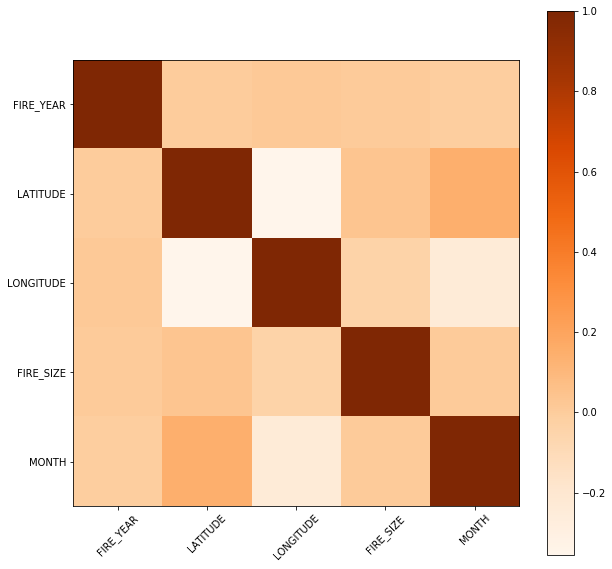

In [0]:
# Plotting correlation matrix

def plot_corr(df,size=10):
    corr = firesML.corr()  #the default method is pearson
    fig, ax = plt.subplots(figsize=(size, size))
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    plt.imshow(corr,cmap=plt.cm.Oranges);
    plt.colorbar();    
 
plot_corr(firesML)